In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
data = pd.read_csv('/Users/simarmalhan/Downloads/winequality-red.csv')

In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
data.shape

(1599, 12)

#### Features

- Fixed acidity: Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- Volitile acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines
- Residual sugar: it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
- Chlorides: The amount of salt in the wine.
- Free sulphur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- Total sulphur dioxide: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
- Density: The density of water is close to that of water depending on the percent alcohol and sugar content.
pH	Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- Sulphates: Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
- Alcohol: The percentage of alcohol contents in the wine.

In [30]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print('Feature list: ', feature_list)
print('Label: ', label)

Feature list:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label:  ['quality']


#### Data Stats

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


*The wine quality can be between 0 and 10 but for this dataset it is between 3 and 8.*

In [35]:
data['quality'].min()

3

In [36]:
data['quality'].max()

8

In [46]:
qualitycounts = data['quality'].value_counts().reset_index()
qualitycounts

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


#### Plotting the quality counts in a bar-plot

Text(0, 0.5, 'Count')

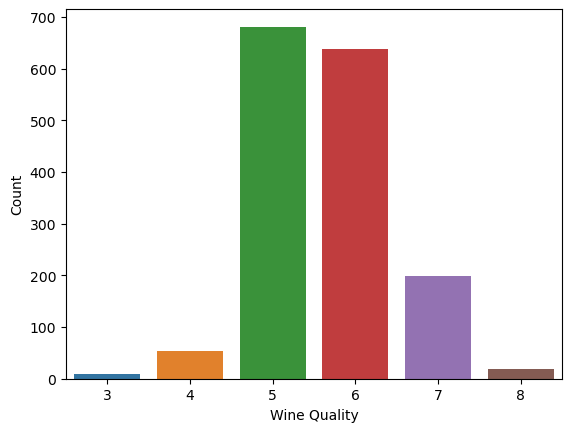

In [48]:
sns.barplot(qualitycounts, x = 'quality', y = 'count')
plt.xlabel('Wine Quality')
plt.ylabel('Count')

#### Plotting pairplots for all numerical attributes

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

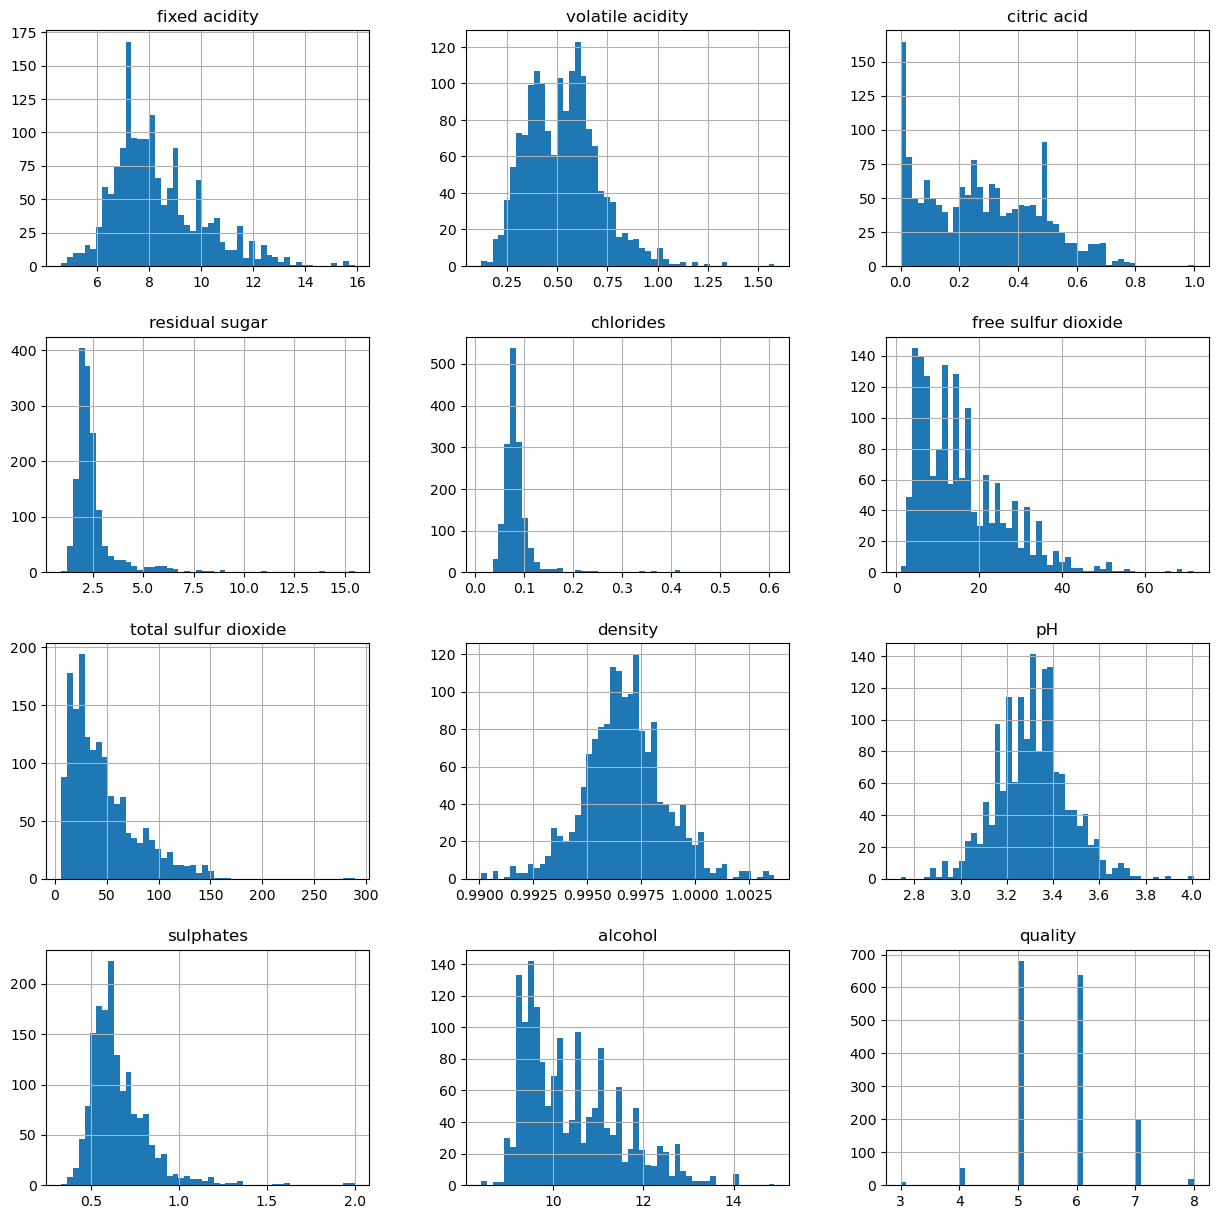

In [50]:
data.hist(bins = 50, figsize = (15, 15))

#### A few observations from these plots:
1. Features are at different scales
2. Features have different distributions.
3. A few are tail-heavy: such as residual sugar and free SO2
4. A few are multiple modes: such as volatile acidity and citric acid.

#### Create test set

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_set, test_set = train_test_split(data, test_size = 0.33, random_state = 42)

#### Stratified sampling
Stratified sampling is a method of selecting samples from a population that is divided into different groups, or "strata," based on a specific characteristic. Instead of just randomly picking from the entire population, you ensure that each group is represented proportionally in the sample.

For example, if you're studying students from different grades in a school, you would make sure to include students from each grade (like 1st, 2nd, 3rd, etc.) in your sample to get a more accurate picture. This helps make sure your sample reflects the diversity of the whole population.

<Axes: xlabel='quality', ylabel='Count'>

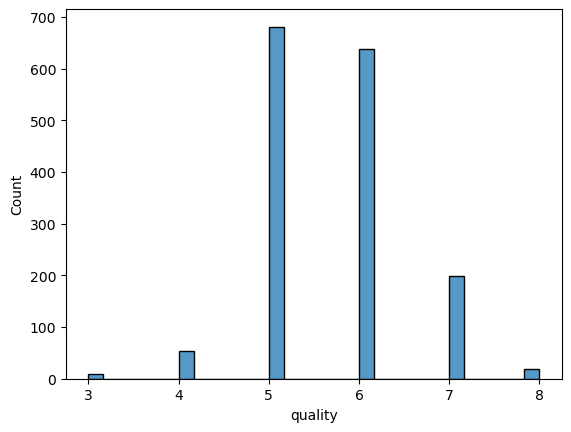

In [60]:
sns.histplot(data['quality'])

*Many examples of class 5 and 6 compared to other classes. This causes problem while random sampling. This is why it is best to go with stratified sampling.*

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sss.split(data, data['quality']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [66]:
train_index, test_index = next(sss.split(data, data['quality']))
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]

In [68]:
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,7
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,5
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,5
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,5
